<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.rename(columns={
    'CHAS': 'CHAS (River)',
    'NOX': 'NOX (Nitric Oxide)',
    'DIS': 'DIS (Distance)',
    'PTRATIO': 'PTRATIO (Pupil-Teacher)',
    'LSTAT': 'LSTAT (% Lower Status)'
}, inplace=True)

In [8]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS (River),NOX (Nitric Oxide),RM,AGE,DIS (Distance),RAD,TAX,PTRATIO (Pupil-Teacher),LSTAT (% Lower Status),MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               506 non-null    int64  
 1   CRIM                     506 non-null    float64
 2   ZN                       506 non-null    float64
 3   INDUS                    506 non-null    float64
 4   CHAS (River)             506 non-null    float64
 5   NOX (Nitric Oxide)       506 non-null    float64
 6   RM                       506 non-null    float64
 7   AGE                      506 non-null    float64
 8   DIS (Distance)           506 non-null    float64
 9   RAD                      506 non-null    float64
 10  TAX                      506 non-null    float64
 11  PTRATIO (Pupil-Teacher)  506 non-null    float64
 12  LSTAT (% Lower Status)   506 non-null    float64
 13  MEDV                     506 non-null    float64
dtypes: float64(13), int64(1)
m

In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS (River),NOX (Nitric Oxide),RM,AGE,DIS (Distance),RAD,TAX,PTRATIO (Pupil-Teacher),LSTAT (% Lower Status),MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
boston_df.isnull().sum()

Unnamed: 0                 0
CRIM                       0
ZN                         0
INDUS                      0
CHAS (River)               0
NOX (Nitric Oxide)         0
RM                         0
AGE                        0
DIS (Distance)             0
RAD                        0
TAX                        0
PTRATIO (Pupil-Teacher)    0
LSTAT (% Lower Status)     0
MEDV                       0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

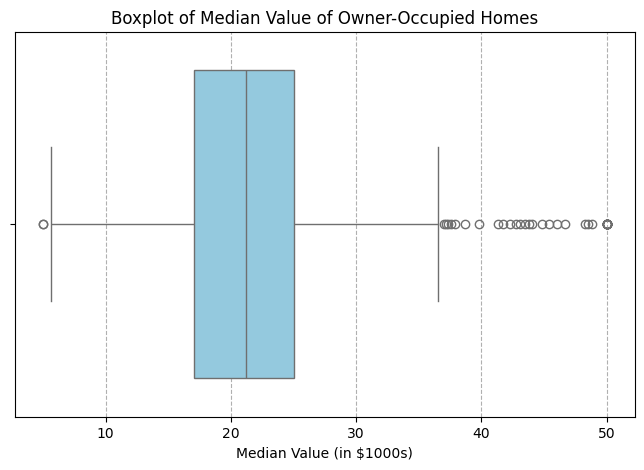

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (in $1000s)')
plt.grid(axis='x', linestyle='--')
plt.show()

<ipython-input-19-54ad0d64e9d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS (River)', data=boston_df, palette='Set2')


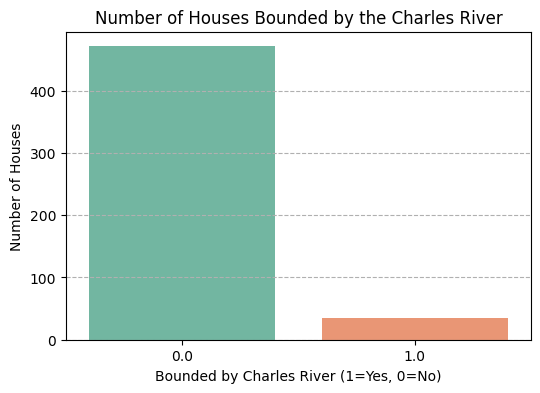

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS (River)', data=boston_df, palette='Set2')
plt.title('Number of Houses Bounded by the Charles River')
plt.xlabel('Bounded by Charles River (1=Yes, 0=No)')
plt.ylabel('Number of Houses')
plt.grid(axis='y', linestyle='--')
plt.show()

In [22]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], 
                         labels=['<=35 years', '36–70 years', '>70 years'])


<ipython-input-23-69c6b0ac0d25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='pastel')


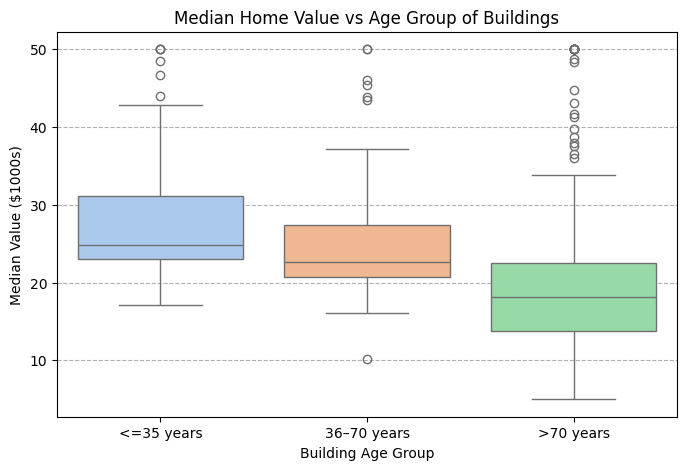

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='pastel')
plt.title('Median Home Value vs Age Group of Buildings')
plt.xlabel('Building Age Group')
plt.ylabel('Median Value ($1000s)')
plt.grid(axis='y', linestyle='--')
plt.show()

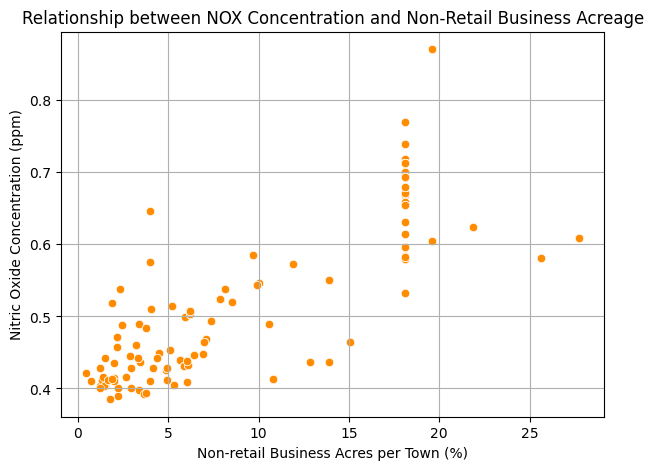

In [24]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX (Nitric Oxide)', data=boston_df, color='darkorange')
plt.title('Relationship between NOX Concentration and Non-Retail Business Acreage')
plt.xlabel('Non-retail Business Acres per Town (%)')
plt.ylabel('Nitric Oxide Concentration (ppm)')
plt.grid(True)
plt.show()

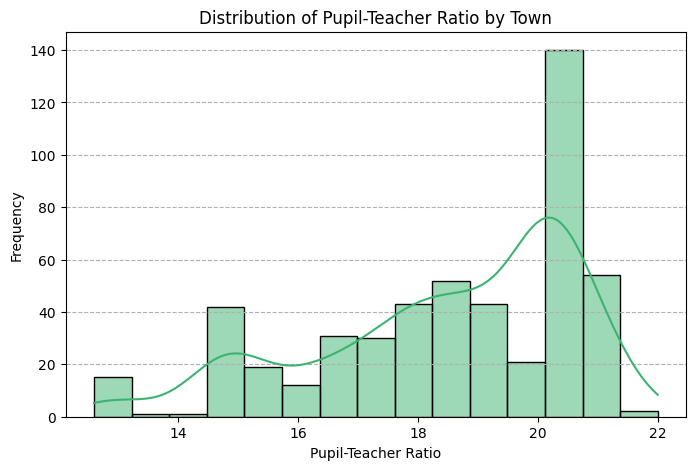

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO (Pupil-Teacher)'], bins=15, kde=True, color='mediumseagreen')
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [35]:
from scipy.stats import ttest_ind

In [36]:
river_yes = boston_df[boston_df['CHAS (River)'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS (River)'] == 0]['MEDV']

In [37]:
t_stat, p_val = ttest_ind(river_yes, river_no, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 3.1133
P-value: 0.0036


In [38]:
from scipy.stats import f_oneway

group1 = boston_df[boston_df['AGE_GROUP'] == '<=35 years']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36–70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70 years']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 36.4076
P-value: 0.0000


In [40]:
from scipy.stats import pearsonr
corr_coef, p_val = pearsonr(boston_df['INDUS'], boston_df['NOX (Nitric Oxide)'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_val:.4f}")

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000


In [42]:
import statsmodels.api as sm
X = boston_df['DIS (Distance)']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        10:34:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.3901      0.817     22.